# Hockey Player Stats

In this project I want to cluster hockey players to determine what makes them great and determine career longevity

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans, AgglomerativeClustering

In [26]:
df = pd.read_csv("Master.csv")

In [27]:
df.columns

Index(['playerID', 'coachID', 'hofID', 'firstName', 'lastName', 'nameNote',
       'nameGiven', 'nameNick', 'height', 'weight', 'shootCatch', 'legendsID',
       'ihdbID', 'hrefID', 'firstNHL', 'lastNHL', 'firstWHA', 'lastWHA', 'pos',
       'birthYear', 'birthMon', 'birthDay', 'birthCountry', 'birthState',
       'birthCity', 'deathYear', 'deathMon', 'deathDay', 'deathCountry',
       'deathState', 'deathCity'],
      dtype='object')

## Preprocessing

In [28]:
df.dtypes

playerID         object
coachID          object
hofID            object
firstName        object
lastName         object
nameNote         object
nameGiven        object
nameNick         object
height          float64
weight          float64
shootCatch       object
legendsID        object
ihdbID          float64
hrefID           object
firstNHL        float64
lastNHL         float64
firstWHA        float64
lastWHA         float64
pos              object
birthYear       float64
birthMon        float64
birthDay        float64
birthCountry     object
birthState       object
birthCity        object
deathYear       float64
deathMon        float64
deathDay        float64
deathCountry     object
deathState       object
deathCity        object
dtype: object

In [29]:
df.head()

,playerID,coachID,hofID,firstName,lastName,nameNote,nameGiven,nameNick,height,weight,...,birthDay,birthCountry,birthState,birthCity,deathYear,deathMon,deathDay,deathCountry,deathState,deathCity
0,aaltoan01,NaN,NaN,Antti,Aalto,NaN,Antti,NaN,73.0,210.0,...,4.0,Finland,NaN,Lappeenranta,NaN,NaN,NaN,NaN,NaN,NaN
1,abbeybr01,NaN,NaN,Bruce,Abbey,NaN,Bruce,NaN,73.0,185.0,...,18.0,Canada,ON,Toronto,NaN,NaN,NaN,NaN,NaN,NaN
2,abbotge01,NaN,NaN,George,Abbott,NaN,George Henry,Preacher,67.0,153.0,...,3.0,Canada,ON,Synenham,NaN,NaN,NaN,NaN,NaN,NaN
3,abbotre01,NaN,NaN,Reg,Abbott,NaN,Reginald Stewart,NaN,71.0,164.0,...,4.0,Canada,MB,Winnipeg,NaN,NaN,NaN,NaN,NaN,NaN
4,abdelju01,NaN,NaN,Justin,Abdelkader,NaN,NaN,NaN,73.0,195.0,...,25.0,USA,MI,Muskegon,NaN,NaN,NaN,NaN,NaN,NaN


First I want to drop all columns that have anything to do with "death" and a bunch of other columns because I do not think they are pertinent to answering my question.

In [30]:
df = df.drop(['deathYear', 'deathMon', 'deathDay', 'deathCountry',
       'deathState', 'deathCity', 'playerID', 'coachID', 'hofID', 'legendsID',
       'ihdbID', 'hrefID','nameNote',
       'nameGiven', 'nameNick', ], axis=1)

In [31]:
df.head()

,firstName,lastName,height,weight,shootCatch,firstNHL,lastNHL,firstWHA,lastWHA,pos,birthYear,birthMon,birthDay,birthCountry,birthState,birthCity
0,Antti,Aalto,73.0,210.0,L,1997.0,2000.0,NaN,NaN,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta
1,Bruce,Abbey,73.0,185.0,L,NaN,NaN,1975.0,1975.0,D,1951.0,8.0,18.0,Canada,ON,Toronto
2,George,Abbott,67.0,153.0,L,1943.0,1943.0,NaN,NaN,G,1911.0,8.0,3.0,Canada,ON,Synenham
3,Reg,Abbott,71.0,164.0,L,1952.0,1952.0,NaN,NaN,C,1930.0,2.0,4.0,Canada,MB,Winnipeg
4,Justin,Abdelkader,73.0,195.0,L,2007.0,2011.0,NaN,NaN,L,1987.0,2.0,25.0,USA,MI,Muskegon


In [45]:
df.isna().sum()

firstName          0
lastName           0
height             0
weight             0
shootCatch       299
firstNHL         487
lastNHL          487
firstWHA        6522
lastWHA         6522
pos               10
birthYear          7
birthMon          25
birthDay          26
birthCountry     141
birthState      1203
birthCity        143
dtype: int64

In [34]:
df.duplicated().sum()

np.int64(0)

In [42]:
df.shape

(7761, 16)

In [43]:
df = df.dropna(subset=['height', 'weight'])

In [44]:
df.shape

(7334, 16)

Now I want to combine the firstNHL, 
lastNH, 
firstW, and 2
last to just be the years that the players played.WHA

In [46]:
df['firstYear'] = df[['firstNHL', 'firstWHA']].min(axis=1, skipna=True)
df['lastYear'] = df[['lastNHL', 'lastWHA']].max(axis=1, skipna=True)

In [47]:
df.isna().sum()

firstName          0
lastName           0
height             0
weight             0
shootCatch       299
firstNHL         487
lastNHL          487
firstWHA        6522
lastWHA         6522
pos               10
birthYear          7
birthMon          25
birthDay          26
birthCountry     141
birthState      1203
birthCity        143
firstYear        134
lastYear         134
dtype: int64

In [48]:
df = df.drop(['firstNHL', 'lastNHL', 'firstWHA', 'lastWHA' ], axis=1)

In [49]:
df = df.dropna(subset=['firstYear', 'lastYear'])

In [50]:
df.isna().sum()

firstName          0
lastName           0
height             0
weight             0
shootCatch       285
pos                0
birthYear          4
birthMon          10
birthDay          10
birthCountry     139
birthState      1196
birthCity        141
firstYear          0
lastYear           0
dtype: int64

I am also going to drop all birth columns except for year because there are to many nulls.

In [51]:
df = df.drop(['birthMon', 'birthDay', 'birthCountry', 'birthState',
       'birthCity' ], axis=1)

In [55]:
df.isna().sum()

firstName       0
lastName        0
height          0
weight          0
shootCatch    285
pos             0
birthYear       0
firstYear       0
lastYear        0
dtype: int64

In [54]:
df = df.dropna(subset = 'birthYear')

In [57]:
df.shape

(7196, 9)

I want to also replace all null shootCatch values with the most common value.

In [59]:
most_common_shootCatch = df['shootCatch'].mode()[0]
df.fillna({'shootCatch' :most_common_shootCatch}, inplace=True)

In [60]:
df.isna().sum()

firstName     0
lastName      0
height        0
weight        0
shootCatch    0
pos           0
birthYear     0
firstYear     0
lastYear      0
dtype: int64

now that my data is cleaned I want to make some more columns

In [62]:
df['ageFirstYear'] = df['firstYear'] - df['birthYear']

In [63]:
df['careerDuration'] = df['lastYear'] - df['firstYear']

In [64]:
df['retirementAge'] = df['lastYear'] - df['birthYear']

In [65]:
df.head(10)

,firstName,lastName,height,weight,shootCatch,pos,birthYear,firstYear,lastYear,ageFirstYear,careerDuration,retirementAge
0,Antti,Aalto,73.0,210.0,L,C,1975.0,1997.0,2000.0,22.0,3.0,25.0
1,Bruce,Abbey,73.0,185.0,L,D,1951.0,1975.0,1975.0,24.0,0.0,24.0
2,George,Abbott,67.0,153.0,L,G,1911.0,1943.0,1943.0,32.0,0.0,32.0
3,Reg,Abbott,71.0,164.0,L,C,1930.0,1952.0,1952.0,22.0,0.0,22.0
4,Justin,Abdelkader,73.0,195.0,L,L,1987.0,2007.0,2011.0,20.0,4.0,24.0
5,Clarence,Abel,73.0,225.0,L,D,1900.0,1926.0,1933.0,26.0,7.0,33.0
6,Gerry,Abel,74.0,168.0,L,L,1944.0,1966.0,1966.0,22.0,0.0,22.0
7,Sid,Abel,71.0,170.0,L,C,1918.0,1938.0,1953.0,20.0,15.0,35.0
8,Dennis,Abgrall,73.0,180.0,R,R,1953.0,1975.0,1977.0,22.0,2.0,24.0
9,Ramzi,Abid,74.0,210.0,L,L,1980.0,2002.0,2006.0,22.0,4.0,26.0


In [66]:
df.dtypes

firstName          object
lastName           object
height            float64
weight            float64
shootCatch         object
pos                object
birthYear         float64
firstYear         float64
lastYear          float64
ageFirstYear      float64
careerDuration    float64
retirementAge     float64
dtype: object

In [68]:
df = df.astype({"birthYear": 'int', "firstYear": 'int', "lastYear": 'int', "ageFirstYear": 'int', "careerDuration": 'int', "retirementAge": 'int'})

In [69]:
df.dtypes

firstName          object
lastName           object
height            float64
weight            float64
shootCatch         object
pos                object
birthYear           int64
firstYear           int64
lastYear            int64
ageFirstYear        int64
careerDuration      int64
retirementAge       int64
dtype: object

# Data Understanding

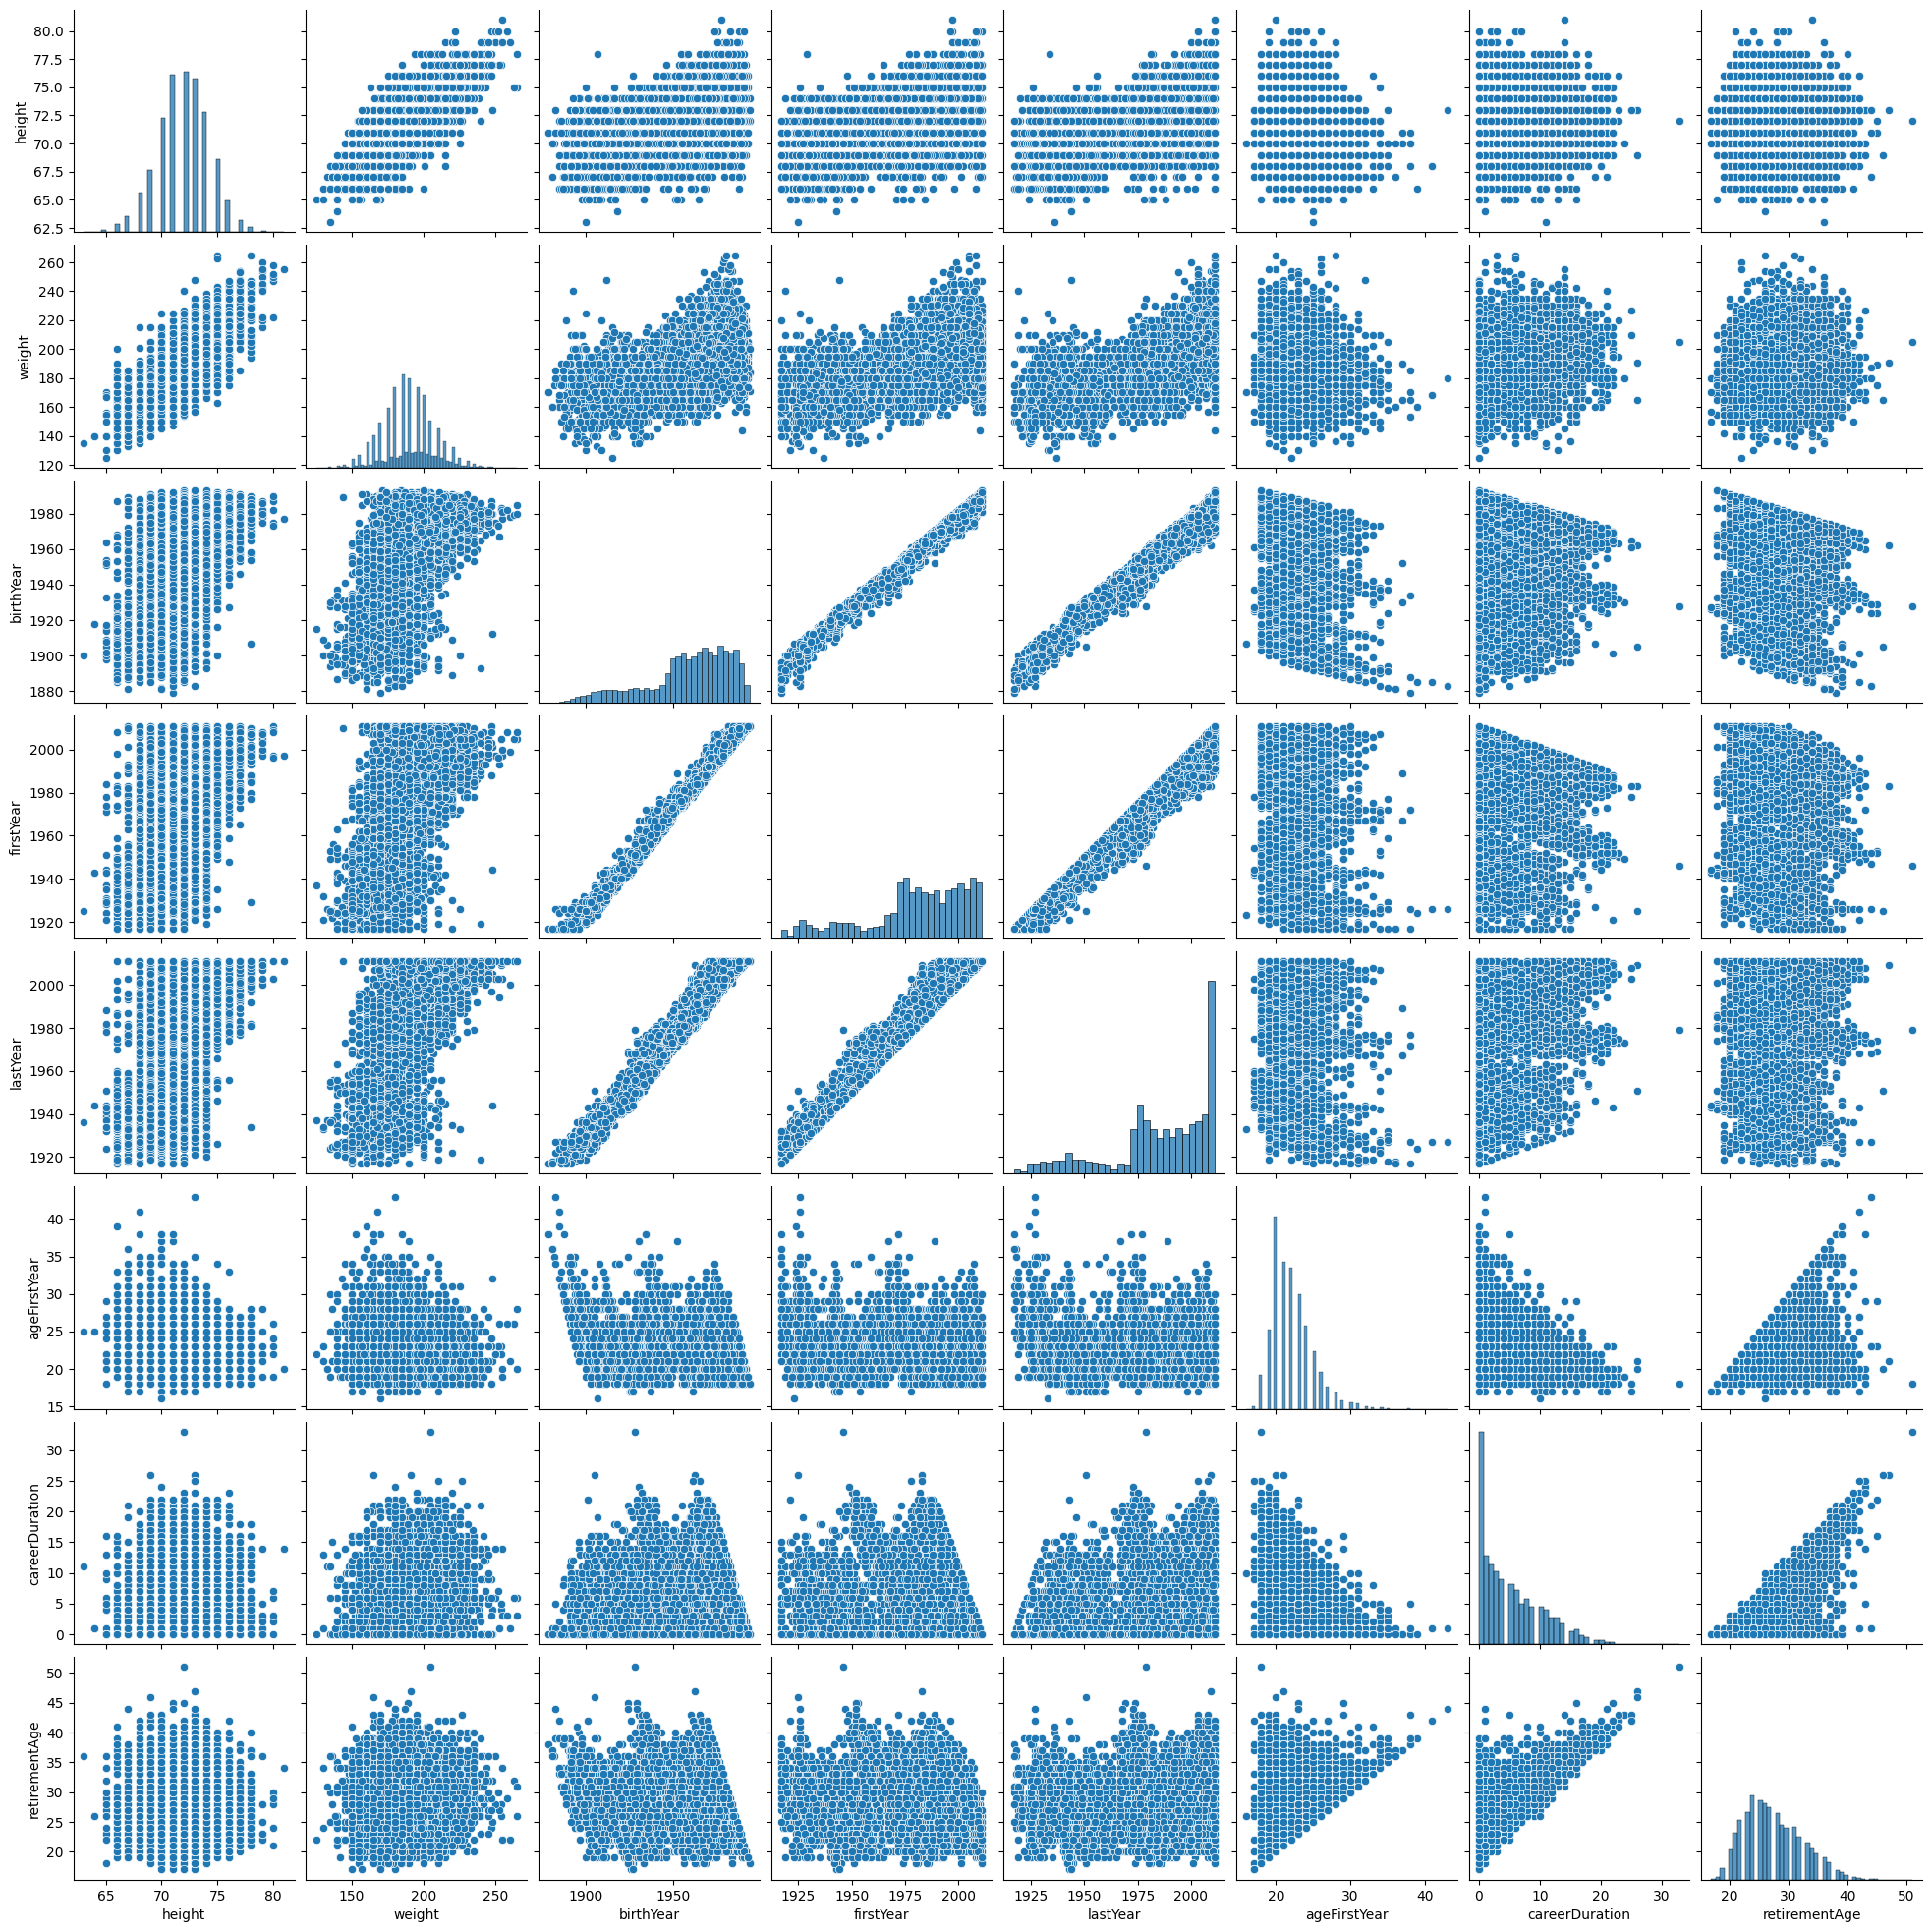

In [71]:
sns.pairplot(df)

<Axes: xlabel='height', ylabel='weight'>

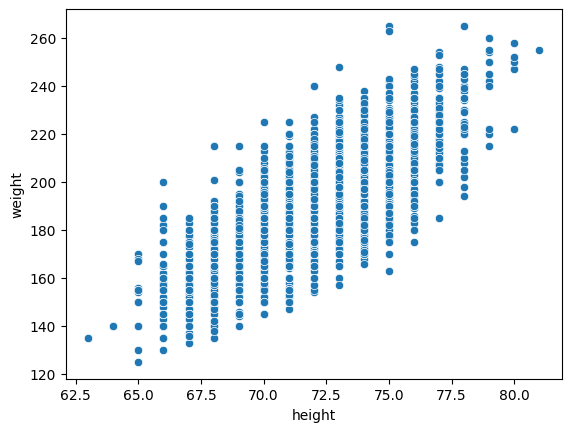

In [79]:
sns.scatterplot(x='height', y='weight', data=df)

## Modeling

First I want to use k-means clustering to make a model of this data. 

In [83]:
x = df[['careerDuration', 'height', 'weight']]

In [84]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

In [85]:
inertia = []
range_k = range(1, 11)

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_x)
    inertia.append(kmeans.inertia_)

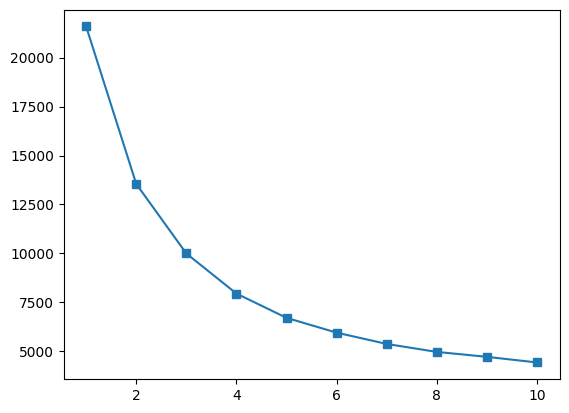

In [89]:
plt.plot(range_k, inertia, marker='s')
plt.show()

I will do 3 clusters to start out

In [91]:
optimal_k = 3 
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_x)

In [92]:
df['cluster'] = clusters

In [94]:
plt.scatter(fe['careerDuration'], features['height'], c=clusters, cmap='viridis', s=50)
plt.xlabel('Career Duration')
plt.ylabel('Height')
plt.title('K-means Clustering Results')
plt.colorbar(label='Cluster')
plt.show()

NameError: name 'features' is not defined